# Introduction

The dataset consists of 70,000 images of fashion/clothing items belonging to 10 different categories/classes. It has furhter been divided into 60,000 training images and 10,000 test images and each image is a 28*28 grayscale image (hence 1 color channel). (https://www.kaggle.com/zalando-research/fashionmnist) 

**Objective**: I have attempted to create a Neural Netwowrk to predict the Classes.

I used vectorization (wherever applicable) to improve the performance of the model and equip it to deal with the complete Fashion MNIST Dataset.

The main methods that I implemented correspond to the four steps of the training process of a NN which are as follows:
1. Initialize variables and initialize weights
2. Forward pass
3. Backward pass AKA Backpropogation
4. Weight Update AKA Gradient Descent



In [ ]:
# making all the necessary imports here

import numpy as np
import pandas as pd
import time
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')
from IPython.display import Image
import pydot
from tqdm import tqdm_notebook
import seaborn as sns
from keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from sklearn.datasets import make_moons
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report
from google.colab import drive
import glob
import cv2

In [ ]:
# This function will be used to plot the confusion matrix at the end of this notebook

def plot_confusion_matrix(conf_mat):
    classes = ['T-shirt/top','Trouser/pants','Pullover shirt','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
    df_cm = pd.DataFrame(conf_mat,classes,classes)
    plt.figure(figsize=(15,9))
    sns.set(font_scale=1.4)
    sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})
    plt.show()

class_labels = ['T-shirt/top','Trouser/pants','Pullover shirt','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

#### __Dataset from Keras Library__

The required library has been imported for you as fashion_mnist. Use it to load the train and test data accordingly.

4423680/4422102 [==============================] - 0s 0us/step
xtrain (60000, 784)
x test (10000, 784)
ytrain (60000, 10)
ytest (10000, 10)


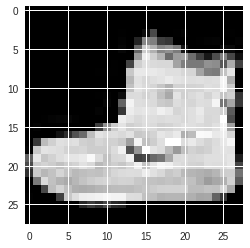

In [ ]:
classes = 10 # Do not change this
import tensorflow as tf
#Download Fashion MNIST dataset
# fashion_mnist = keras.dataset.fashion_mnist
###### Code Here ######


(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()


y_train = tf.keras.utils.to_categorical(
    y_train, num_classes=10, dtype='float32'
)

y_test = tf.keras.utils.to_categorical(
    y_test, num_classes=10, dtype='float32'
)

X_train = X_train.flatten().reshape(60000,784)
X_test = X_test.flatten().reshape(10000,784)
X_test = X_test/255.0
X_train = X_train/255.0
print("xtrain",X_train.shape)
print("x test",X_test.shape)
print("ytrain",y_train.shape)
print("ytest",y_test.shape)


plt.imshow(X_train[0:1].reshape(28,28).squeeze(),cmap = "gray") # just to check if dataset is being loaded properly

#### __NN Implementation__
Your implementation of NN needs to use the `sigmoid` activation function for all hidden layers and the `softmax` activation function for the output layer. The NN model you will be creating here will consits of only three layers: 1 input layer, n hidden layers (where you have the liberty to define n) and 1 output layer.

In [ ]:
class NeuralNetwork():
    @staticmethod
    def cross_entropy_loss(y_pred, y_true):
        # implement cross_entropy_loss function
        #TO DO
        loss = - np.sum(y_true * np.log(y_pred),axis = 1, keepdims = True)
        # cost = np.mean(loss)
        # dim = loss.shape
        # print(dim)
        # print("loss", loss.shape)
        return np.sum(loss)

    @staticmethod
    def accuracy(y_pred, y_true):
        # implement accuracy function
        #TO DO
        count = 0 
        for i in range(len(y_pred)):
          if y_pred[i] == y_true[i]:
            count = count + 1
          
        return count/len(y_pred)

    @staticmethod
    def softmax(x):
        # implement softmax function
        #TO DO
        x = np.exp(x)
        return x/np.sum(x) 

    @staticmethod
    def sigmoid(x):
        #TO DO
        x = -x 
        exp = np.exp(x) + 1
        return 1/exp

    def __init__(self, nodes_per_layer):
        '''Creates a Feed-Forward Neural Network.
        The parameters represent the number of nodes in each layer. 
        Look at the inputs to the function, and use 'try and accept'
        to catch errors if number of layers are < 2.
        '''
        if len(nodes_per_layer) < 2:
          raise Exception('Cannot have less than 2 hidden layers')
        self.num_layers = 2+len(nodes_per_layer) # including input and output layers
        self.nodes_per_layer = nodes_per_layer
        self.input_shape = 784
        self.output_shape = 10

        self.weights_ = []
        self.biases_ = []
        self.__init_weights(nodes_per_layer)

    def __init_weights(self, nodes_per_layer):
        '''Initializes all weights based on standard normal distribution and all biases to 0.'''
        '''Initialize weights for each layer except the input layer, since it does not have weights.'''
        
        ###### Code Here ######
        self.weights_.append(np.random.normal(size= (self.nodes_per_layer[0],self.input_shape)))
        self.biases_.append(np.zeros(shape=(self.nodes_per_layer[0],1)))

        #loop
        for i in range(len(self.nodes_per_layer)):
          if i == 0: #sasta kaam
            continue
          self.weights_.append(np.random.normal(size= (self.nodes_per_layer[i],self.nodes_per_layer[i-1])))
          self.biases_.append(np.zeros(shape=(self.nodes_per_layer[i],1)))
        
        self.weights_.append(np.random.normal(size= (self.output_shape,self.nodes_per_layer[-1])))
        self.biases_.append(np.zeros(shape=(self.output_shape,1)))
       
    
    def forward_pass(self, input_data):
        '''Executes the feed forward algorithm.
        "input_data" is the input to the network in row-major form
        Returns "activations", which is a list of all layer outputs (excluding input layer of course)'''
        
        ###### Code Here ######
        # tyaar
        activations = [] #initialize
        # print("inputdatashape",input_data.shape)
        # print(self.weights_[0].shape)
        a = np.dot(self.weights_[0],input_data.T) 
        # print("a shape", a.shape)
        a += self.biases_[0]

        z = NeuralNetwork.sigmoid(a) 

        activations.append(z)

        for i in range(1,len(self.nodes_per_layer)):
          a_i = np.dot(self.weights_[i],activations[-1]) + self.biases_[i]
          z_i = NeuralNetwork.sigmoid(a_i)
          activations.append(z_i)
        
        a_o = np.dot(self.weights_[-1],activations[-1]) + self.biases_[-1]
        z_o = NeuralNetwork.softmax(a_o)
        activations.append(z_o.T)

        return activations

    def backward_pass(self, targets, layer_activations):
        '''Executes the backpropogation algorithm.
        "targets" is the ground truth/labels
        "layer_activations" are the return value of the forward pass step
        Returns "deltas", which is a list containing weight update values for all layers (excluding the input layer of course)'''
        
        ###### Code Here ######
        deltas = []

        d_b_o = layer_activations[-1] - targets
        d_b_o = d_b_o.T
        deltas.append(d_b_o)

        for i in range(len(self.nodes_per_layer)-1,-1,-1):
          dy_dz_h = (layer_activations[i])*(1-(layer_activations[i]))
          dy_dz = np.dot(self.weights_[i+1].T,deltas[-1])
          multiplication = np.multiply(dy_dz,dy_dz_h)
          deltas.append(multiplication)
        
        deltas.reverse()
        return deltas
    
    def weight_update(self, deltas, layer_inputs, lr):
        '''Executes the gradient descent algorithm.
        "deltas" is return value of the backward pass step
        "layer_inputs" is a list containing the inputs for all layers (including the input layer)
        "lr" is the learning rate'''
        
        ###### Code Here ######
        for i in range(len(self.weights_)):
          if i == 0:
            transpose = layer_inputs[i]
          else:
            transpose = layer_inputs[i].T
          gradient = np.dot(deltas[i],transpose)
          self.weights_[i] -= lr*gradient
          self.biases_[i] -= lr*deltas[i]
  
    
    ###### Do Not Change Anything Below this line in This Cell ######
    
    def fit(self, Xs, Ys, epochs, lr=1e-3):
            history = []
            for epoch in tqdm_notebook(range(epochs)):
                num_samples = Xs.shape[0]
                for i in range(num_samples):

                    sample_input = Xs[i,:].reshape((1,self.input_shape))
                    sample_target = Ys[i,:].reshape((1,self.output_shape))
                    
                    activations = self.forward_pass(sample_input)   # Call forward_pass function 
                    deltas = self.backward_pass(sample_target, activations)    # Call backward_pass function 
                    layer_inputs = [sample_input] + activations[:-1]
                    
                    # Call weight_update function 
                    self.weight_update(deltas, layer_inputs, lr)
                
                preds = self.predict(Xs)   # Call predict function 

                current_loss = self.cross_entropy_loss(preds, Ys)
                
                if  epoch==epochs-1:
                  confusion_mat=confusion_matrix(Ys.argmax(axis=1), preds.argmax(axis=1),labels=np.arange(10))  
                  plot_confusion_matrix(confusion_mat)
                  report = classification_report(Ys, np_utils.to_categorical(preds.argmax(axis=1),num_classes=classes), target_names=class_labels)
                  print(report)
                history.append(current_loss)
            return history
    
    def predict(self, Xs):
        '''Returns the model predictions (output of the last layer) for the given "Xs".'''
        predictions = []
        num_samples = Xs.shape[0]
        for i in range(num_samples):
            sample = Xs[i,:].reshape((1,self.input_shape))
            sample_prediction = self.forward_pass(sample)[-1]
            predictions.append(sample_prediction.reshape((self.output_shape,)))
        return np.array(predictions)
    
    def evaluate(self, Xs, Ys):
        '''Returns appropriate metrics for the task, calculated on the dataset passed to this method.'''
        pred = self.predict(Xs)
        return self.cross_entropy_loss(pred, Ys), self.accuracy(pred.argmax(axis=1), Ys.argmax(axis=1))
    
    def plot_model(self, filename):
        '''Provide the "filename" as a string including file extension. Creates an image showing the model as a graph.'''
        graph = pydot.Dot(graph_type='digraph')
        graph.set_rankdir('LR')
        graph.set_node_defaults(shape='circle', fontsize=0)
        nodes_per_layer = [self.input_shape, self.hidden_shape, self.output_shape]
        for i in range(self.num_layers-1):
            for n1 in range(nodes_per_layer[i]):
                for n2 in range(nodes_per_layer[i+1]):
                    edge = pydot.Edge(f'l{i}n{n1}', f'l{i+1}n{n2}')
                    graph.add_edge(edge)
        graph.write_png(filename)

In [ ]:
# These are what we call the hyperparameters (a.k.a Black Magic). You need to research on them and tweak them to see what generates the best result for you 

EPOCH = 140           
LEARNING_RATE = 0.001  
nodes_per_layer = [150,75] # please note: we are only taking input for the hidden layers since input and ouput layer have fixed number of nodes!
                           # so nodes per layer will only get the nodes for hidden layers and the number of nodes must be atleast 2!


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:145: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


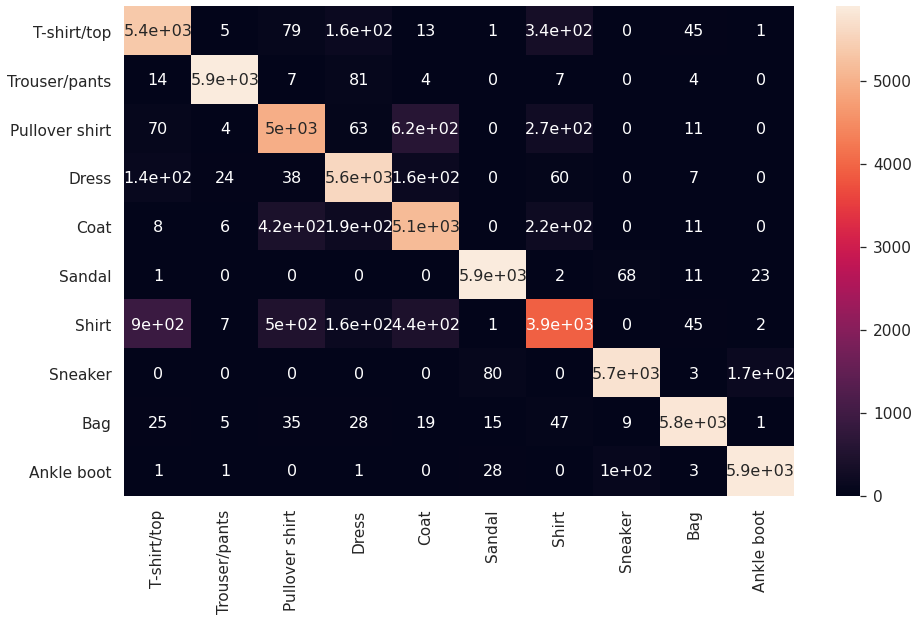

                precision    recall  f1-score   support

   T-shirt/top       0.82      0.89      0.86      6000
 Trouser/pants       0.99      0.98      0.99      6000
Pullover shirt       0.82      0.83      0.82      6000
         Dress       0.89      0.93      0.91      6000
          Coat       0.80      0.86      0.83      6000
        Sandal       0.98      0.98      0.98      6000
         Shirt       0.81      0.66      0.72      6000
       Sneaker       0.97      0.96      0.96      6000
           Bag       0.98      0.97      0.97      6000
    Ankle boot       0.97      0.98      0.97      6000

     micro avg       0.90      0.90      0.90     60000
     macro avg       0.90      0.90      0.90     60000
  weighted avg       0.90      0.90      0.90     60000
   samples avg       0.90      0.90      0.90     60000


Runtime of the algorithm is  7395.21  seconds
(4346.557956530026, 0.8527)


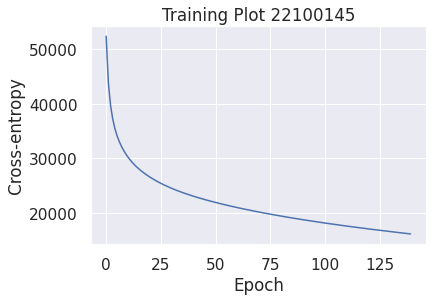

In [ ]:
start = time.time()

# Instantiate the neural network with the number of nodes you choose per layer, right now it is done for three layers only.
nn = NeuralNetwork(nodes_per_layer=nodes_per_layer)
history = nn.fit(X_train, y_train, epochs=EPOCH, lr=LEARNING_RATE)
plt.plot(history);
plt.gca().set(xlabel='Epoch', ylabel='Cross-entropy', title='Training Plot {}'.format(rollnumber));
end = time.time()

print("Runtime of the algorithm is ", round((end - start),3)," seconds")

# print accuracy on test set here
print(nn.evaluate(X_test,y_test))